In [1]:
import pandas as pd

In [2]:
import csv

In [3]:
file=open('BMI2.csv')
type(file)

_io.TextIOWrapper

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv("BMI2.csv")
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
data.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [7]:
import seaborn as sns

<AxesSubplot: xlabel='Gender', ylabel='count'>

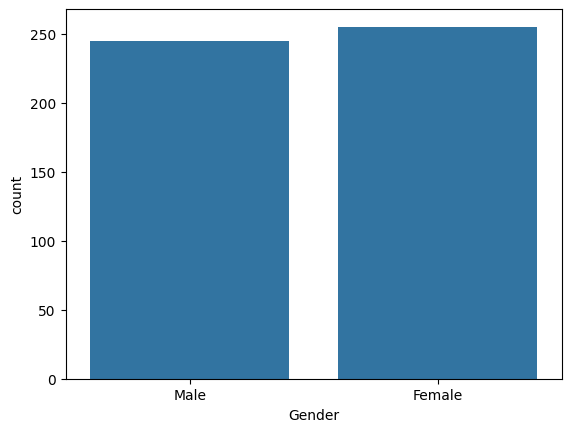

In [9]:
sns.countplot(x='Gender',data=data)

In [10]:
data.groupby('Gender').size()

Gender
Female    255
Male      245
dtype: int64

In [11]:
data[data['Gender']=='Male']['Height'].mean()

169.64897959183673

In [13]:
data[data['Gender'] == 'Male']['Weight'].mean()

106.31428571428572

In [14]:
data[data['Gender']=='Female']['Height'].mean()

170.22745098039215

In [15]:
data[data['Gender'] == 'Female']['Weight'].mean()

105.69803921568628

In [16]:
avg_data = data.groupby('Gender',as_index=False).mean()
print(avg_data)

   Gender      Height      Weight     Index
0  Female  170.227451  105.698039  3.709804
1    Male  169.648980  106.314286  3.787755


<AxesSubplot: xlabel='Gender', ylabel='count'>

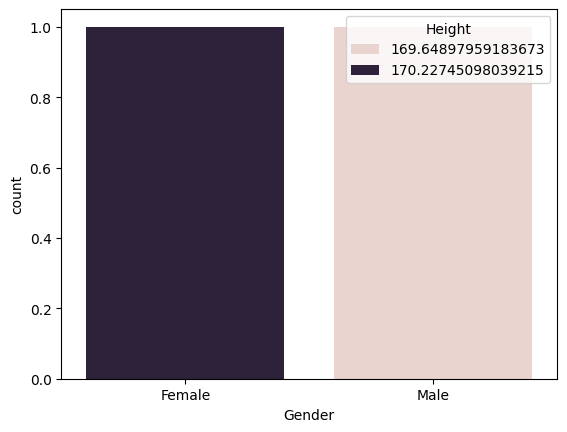

In [17]:
sns.countplot(x='Gender',hue='Height',data=avg_data)

<AxesSubplot: xlabel='Gender', ylabel='count'>

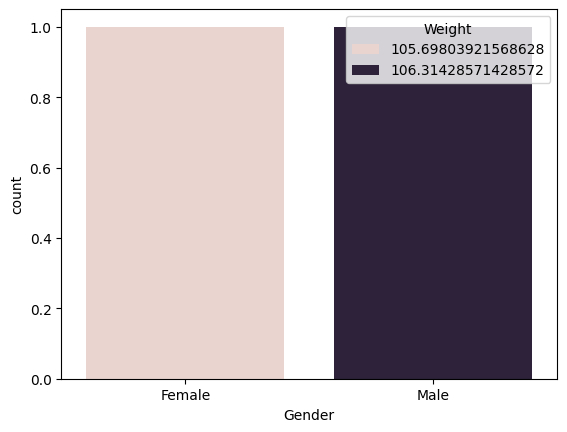

In [18]:
sns.countplot(x='Gender',hue='Weight',data=avg_data)

<AxesSubplot: xlabel='Gender', ylabel='count'>

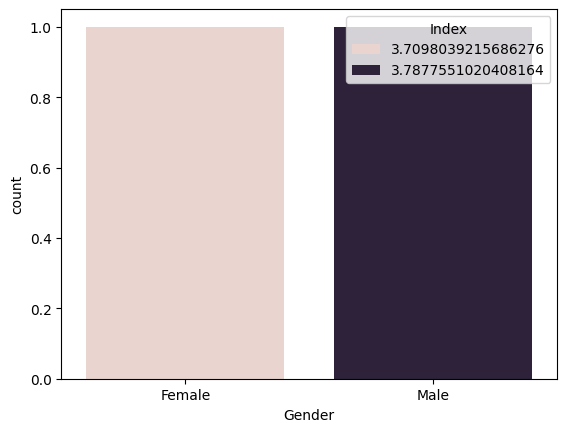

In [19]:
sns.countplot(x='Gender',hue='Index',data=avg_data)

In [20]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [21]:
data.shape

(500, 4)

In [22]:
sex=pd.get_dummies(data['Gender'],drop_first=True)
sex.head(4)

,Male
0,True
1,True
2,False
3,False


In [24]:
data = pd.concat([data,sex],axis=1)
data.head(5)

,Gender,Height,Weight,Index,Male
0,Male,174,96,4,True
1,Male,189,87,2,True
2,Female,185,110,4,False
3,Female,195,104,3,False
4,Male,149,61,3,True


In [25]:
data.drop('Gender',axis=1,inplace=True)
data.head(5)

,Height,Weight,Index,Male
0,174,96,4,True
1,189,87,2,True
2,185,110,4,False
3,195,104,3,False
4,149,61,3,True


In [26]:
X = data.drop('Index',axis=1)
y = data['Index']

In [33]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,neighbors
clsf = neighbors.KNeighborsClassifier()
clsf.fit(X_train,y_train)
pred_y = clsf.predict(X_test)
accuracy_score(y_test,pred_y)*100

92.66666666666666

In [36]:
import pickle
pickle.dump(clsf, open('model.pkl','wb'))

In [37]:
model = pickle.load(open('model.pkl','rb'))
model.predict([[170,58.5,1]])

c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [38]:
dataset.Weight.dtypes

dtype('int64')